In [30]:
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from statsforecast import StatsForecast
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

/Users/admin/Personal/Code/datascience-for-ek/.venv/lib/python3.12/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/admin/Personal/Code/datascience-for-ek/.venv/lib/python3.12/site-packages/utilsforecast/plotting.py:30: SyntaxWarning: invalid escape sequence '\('
  models_pat = r"|".join(models).replace("(", "\(").replace(")", "\)")
/Users/admin/Personal/Code/datascience-for-ek/.venv/lib/python3.12/site-packages/utilsforecast/plotting.py:30: SyntaxWarning: invalid escape sequence '\)'
  models_pat = r"|".join(models).replace("(", "\(").replace(")", "\)")


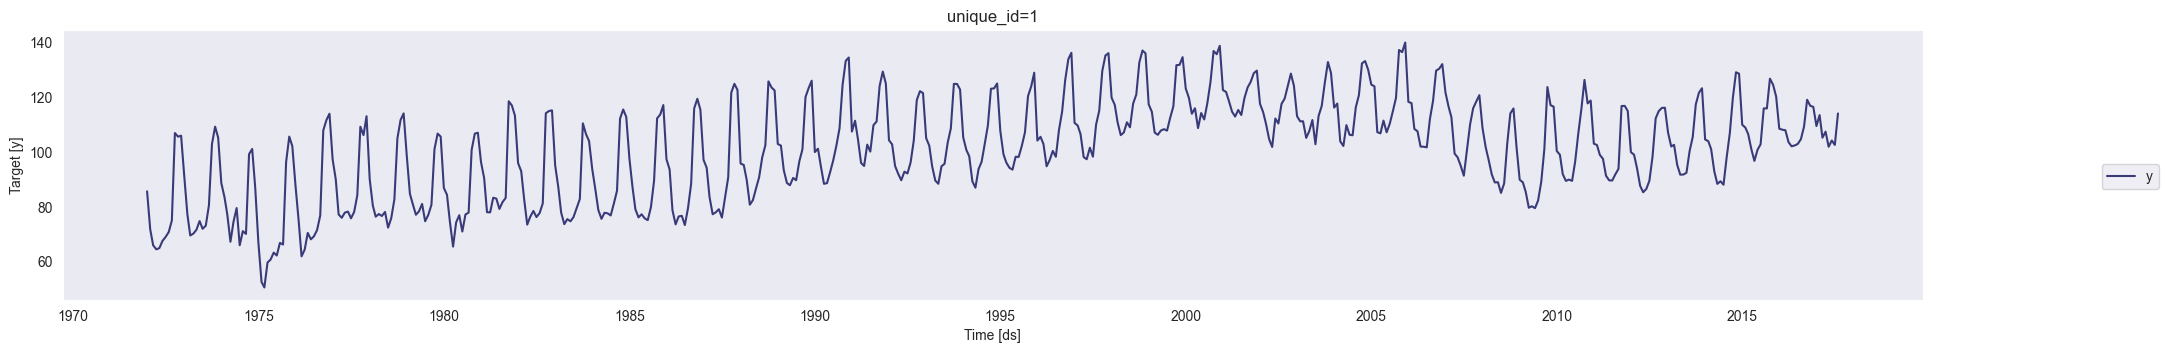

In [19]:
csv = requests.get(
    "https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/candy_production.csv",
    verify=False)
csv_io = io.StringIO(csv.text)

df = pd.read_csv(csv_io)
df["unique_id"] = "1"
df.columns = ["ds", "y", "unique_id"]
df["ds"] = pd.to_datetime(df["ds"])
StatsForecast.plot(df, engine="matplotlib")

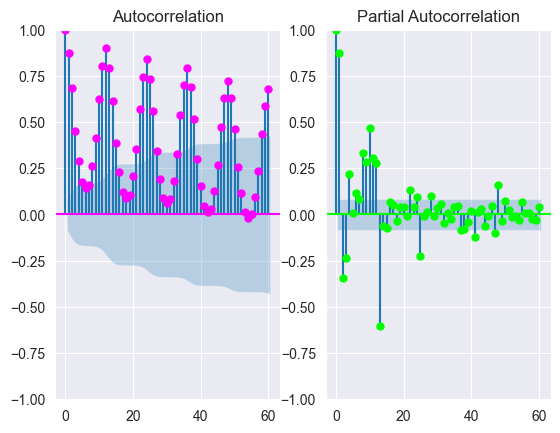

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"], lags=60, ax=axs[0], color="fuchsia")
axs[0].set_title("Autocorrelation");

plot_pacf(df["y"], lags=60, ax=axs[1], color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

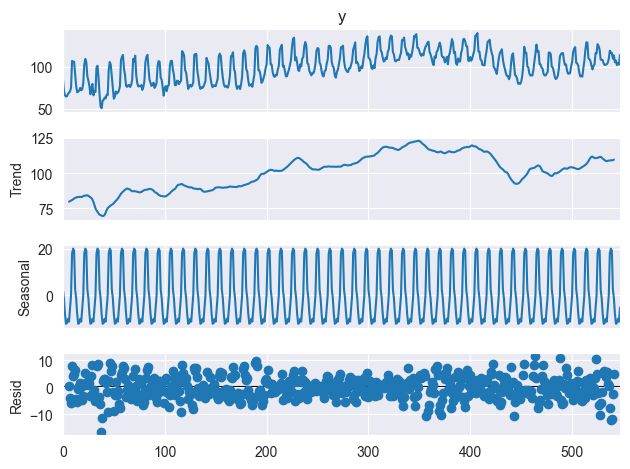

In [25]:
a = seasonal_decompose(df["y"], model="add", period=12)
a.plot();

In [27]:
Y_train_df = df[df.ds <= '2016-08-01']
Y_test_df = df[df.ds > '2016-08-01']
Y_train_df.shape, Y_test_df.shape

((536, 3), (12, 3))

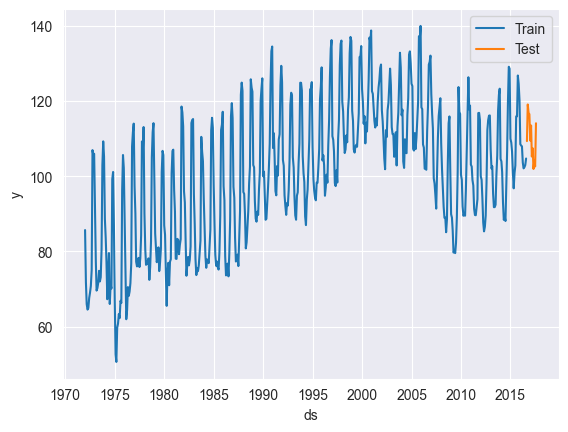

In [29]:
sns.lineplot(Y_train_df, x="ds", y="y", label="Train")
sns.lineplot(Y_test_df, x="ds", y="y", label="Test")
plt.show()

In [34]:
season_length = 12  # Monthly data 
horizon = len(Y_test_df)  # number of predictions

models = [AutoARIMA(season_length=season_length)]
sf = StatsForecast(
    models=models,
    freq='MS',
    n_jobs=-1
)
sf = sf.fit(df=Y_train_df)

In [35]:
arima_string(sf.fitted_[0,0].model_)

'ARIMA(1,0,0)(0,1,2)[12]                   '

In [41]:
df = pd.read_csv('assets/s&p500_max.csv')
df = df[df.date > '2000-01-01']
df.date = pd.to_datetime(df.date)
training_df = pd.DataFrame({
    unique
})


,symbol,date,open,high,low,close,volume,adjclose
14581,^GSPC,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1455.219971
14582,^GSPC,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1399.420044
14583,^GSPC,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1402.109985
14584,^GSPC,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1403.449951
14585,^GSPC,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1441.469971
...,...,...,...,...,...,...,...,...
20704,^GSPC,2024-05-06,5142.419922,5181.000000,5142.419922,5180.740234,3683250000,5180.740234
20705,^GSPC,2024-05-07,5187.200195,5200.229980,5178.959961,5187.700195,3987890000,5187.700195
20706,^GSPC,2024-05-08,5168.979980,5191.950195,5165.859863,5187.669922,3842100000,5187.669922
20707,^GSPC,2024-05-09,5189.029785,5215.299805,5180.410156,5214.080078,3727370000,5214.080078
